In [70]:
import requests
import tweepy # https://docs.tweepy.org/en/stable/index.html
import networkx as nx
import time
import random
import json
import matplotlib.pyplot as plt

Insert own bearer token to run the code to get the followers.

Will take a few hours due to rate limitations

**Can also just use the json file I saved from running the code below**

To do so, go down until you see a json file being loaded.

In [2]:
# Authorization to use API
bearer_token = ''

if not bearer_token:
    print('Please include a bearer token')

client = tweepy.Client(bearer_token=bearer_token)

In [3]:
# to get id then use get_users_followers
user = client.get_user(username = 'rechambadi').data
print('Name:', user.name)
print('Username:', user.username)
print('ID:', user.id)

Name: Raj Echambadi
Username: rechambadi
ID: 21366430


In [4]:
# Rate Limited, 15 follower lookup every 15 minutes, which has max 1000 users
# since only 1 followers lookup per minute, i decided to just randomly choose 50 followers per user to further expand

# start with rechambadi
# get all his followers, randomly choose 50
# expand those 50 users of their followers and following one time

FOLLOWERS = []
next_tokens = []

followers = client.get_users_followers(id = user.id, max_results = 1000)
FOLLOWERS.extend(followers.data)
#print(followers.meta, type((followers.meta)))

# if more followers, need to request more
while ('next_token' in followers.meta and followers.meta['next_token']):
    next_tokens.append(followers.meta['next_token'])
    followers = client.get_users_followers(id = user.id, pagination_token = followers.meta['next_token'], 
                                           max_results = 1000)
    #print(followers.meta, type((followers.meta)))
    FOLLOWERS.extend(followers.data)
    time.sleep(61)

In [5]:
# randomly choose 50 of followers to further expand
FOLLOWERS = random.sample(FOLLOWERS, 50)

EDGES = [] # [(follower, user), (follower1, user), (follower, user1) ...]

for f in FOLLOWERS:
    EDGES.append((f.username, user.username))

# to save, just incase errors
json.dump(EDGES, open('edges.json', 'w', encoding = 'utf8'), indent = 1)
    
# this gets all the followers of rechambadi done.
# now onto his followers

In [6]:
FOLLOWERS

[<User id=25067444 name=Curtis L. Odom, Ed.D. username=drcurtisodom>,
 <User id=248865238 name=IllinoisEMBA Chicago username=IllinoisEMBA>,
 <User id=172556818 name=Felicia Lassk username=FeliciaLassk>,
 <User id=487436702 name=Joey Mak username=thejoeymak>,
 <User id=348825373 name=Michael D. Wiemer, MBA username=mdwiemer>,
 <User id=1035935395 name=Jennifer Yule username=Jenyule>,
 <User id=16579179 name=Cari McLean username=carimclean>,
 <User id=17678059 name=Betsy username=Betsyabdallah>,
 <User id=209599780 name=Sathish Aruchamy username=sathisharucham>,
 <User id=136252120 name=Priyabrata Purohit username=priksp08>,
 <User id=16324793 name=Handyside username=Handyside>,
 <User id=1437396787699109891 name=Veronica username=Veronic67691706>,
 <User id=1190263446396227584 name=Business Management Degree username=Bus_Mgmt_USA>,
 <User id=51670354 name=William Yeoh username=gsyeoh>,
 <User id=617896236 name=Arshad Saiyed username=asaiyed9>,
 <User id=2705626957 name=Len.Musielak user

In [66]:
# for each of his followers, get their followers and who they follow, one time, did 100 each, as 1000 maybe too much
# project desc says at least 100-500 nodes, already a lot over, but i feel like any less wouldn't give much interesting info

#total = 0
for f in FOLLOWERS:
    
    f_followers = client.get_users_followers(id = f.id, max_results = 100)
    time.sleep(61)
    if f_followers.data:
        for wers in f_followers.data:
            EDGES.append((wers.username, f.username))
        
    f_following = client.get_users_following(id = f.id, max_results = 100)
    time.sleep(61)
    if f_following.data:
        for wing in f_following.data:
            EDGES.append((f.username, wing.username))
    
    # to save, just incase errors
    json.dump(EDGES, open('edges.json', 'w', encoding = 'utf8'), indent = 1)
    
    total += 1
    #print(total, f.username, 'done')

In [68]:
EDGES

[('drcurtisodom', 'rechambadi'),
 ('IllinoisEMBA', 'rechambadi'),
 ('FeliciaLassk', 'rechambadi'),
 ('thejoeymak', 'rechambadi'),
 ('mdwiemer', 'rechambadi'),
 ('Jenyule', 'rechambadi'),
 ('carimclean', 'rechambadi'),
 ('Betsyabdallah', 'rechambadi'),
 ('sathisharucham', 'rechambadi'),
 ('priksp08', 'rechambadi'),
 ('Handyside', 'rechambadi'),
 ('Veronic67691706', 'rechambadi'),
 ('Bus_Mgmt_USA', 'rechambadi'),
 ('gsyeoh', 'rechambadi'),
 ('asaiyed9', 'rechambadi'),
 ('LenM_Ops', 'rechambadi'),
 ('schools_center', 'rechambadi'),
 ('KrentPendleton', 'rechambadi'),
 ('MBAchic', 'rechambadi'),
 ('dominicipi', 'rechambadi'),
 ('SamWesleyAdams', 'rechambadi'),
 ('aricrindfleisch', 'rechambadi'),
 ('criedl', 'rechambadi'),
 ('kwiller', 'rechambadi'),
 ('RumoHasan', 'rechambadi'),
 ('venkatkswamy', 'rechambadi'),
 ('steffel_mary', 'rechambadi'),
 ('INHSillinois', 'rechambadi'),
 ('Tenlegs', 'rechambadi'),
 ('susa0910', 'rechambadi'),
 ('KevinJBoudreau', 'rechambadi'),
 ('JoshiSunny', 'rechamb

## Can use included json file with the edges instead

In [ ]:
# Can also just use json file with all the edges already saved
EDGES = json.load(open('edges.json', 'r', encoding = 'utf8'))
EDGES = [tuple(e) for e in EDGES]

## Analysis

In [109]:
print('Total Nodes:', G.number_of_nodes())

Total Nodes: 8226


In [110]:
print('Total Edges:', len(EDGES))

Total Edges: 9066


In [86]:
G = nx.DiGraph()
G.add_edges_from(EDGES)

### Degree Distribution

Text(0.5, 0, 'Degree')

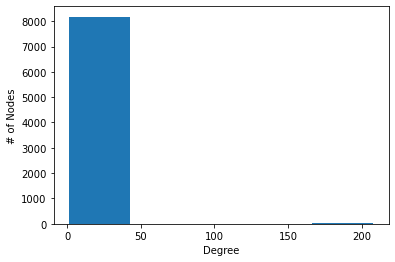

In [136]:
# Degree histogram
d = dict(G.degree())
degrees = [v for k,v in d.items()]
plt.hist(degrees, bins = 5)
plt.ylabel('# of Nodes')
plt.xlabel('Degree')

In [95]:
sum(degrees) / len(degrees)

2.200097252613664

In [117]:
print(max(d, key=d.get), 'Degree:', max(degrees))

NU_Business Degree: 208


In [106]:
degrees_counts = {i:degrees.count(i) for i in degrees}
print(degrees_counts)

{200: 10, 56: 1, 202: 7, 133: 1, 201: 21, 97: 1, 203: 1, 81: 1, 185: 1, 186: 1, 111: 1, 90: 1, 1: 7452, 135: 1, 208: 1, 2: 668, 4: 9, 8: 1, 3: 45, 5: 1, 6: 1}


### PageRank

Text(0.5, 0, 'PageRank')

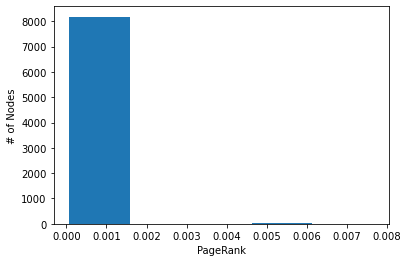

In [137]:
pr = nx.pagerank(G, alpha = 0.85)
# Pagerank Histogram
pagerank = [v for k,v in pr.items()]
plt.hist(pagerank, bins = 5)
plt.ylabel('# of Nodes')
plt.xlabel('PageRank')

In [138]:
sum(pagerank) / len(pagerank)

0.00012156576707998846

In [139]:
print(max(pr, key=pr.get), 'Degree:', max(pagerank))

LenM_Ops Degree: 0.007660953562847576


### Closeness

In [141]:
cls = nx.closeness_centrality(G)
closeness = [v for k,v in cls.items()]

Text(0.5, 0, 'Closeness Centrality')

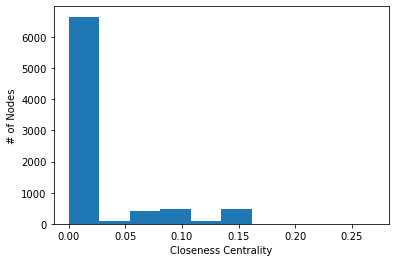

In [142]:
# Pagerank Histogram
plt.hist(closeness, bins = 10)
plt.ylabel('# of Nodes')
plt.xlabel('Closeness Centrality')

In [143]:
sum(closeness) / len(closeness)

0.021577550405051597

In [144]:
print(max(cls, key=cls.get), 'Degree:', max(closeness))

rechambadi Degree: 0.26900564481111594


## Graph

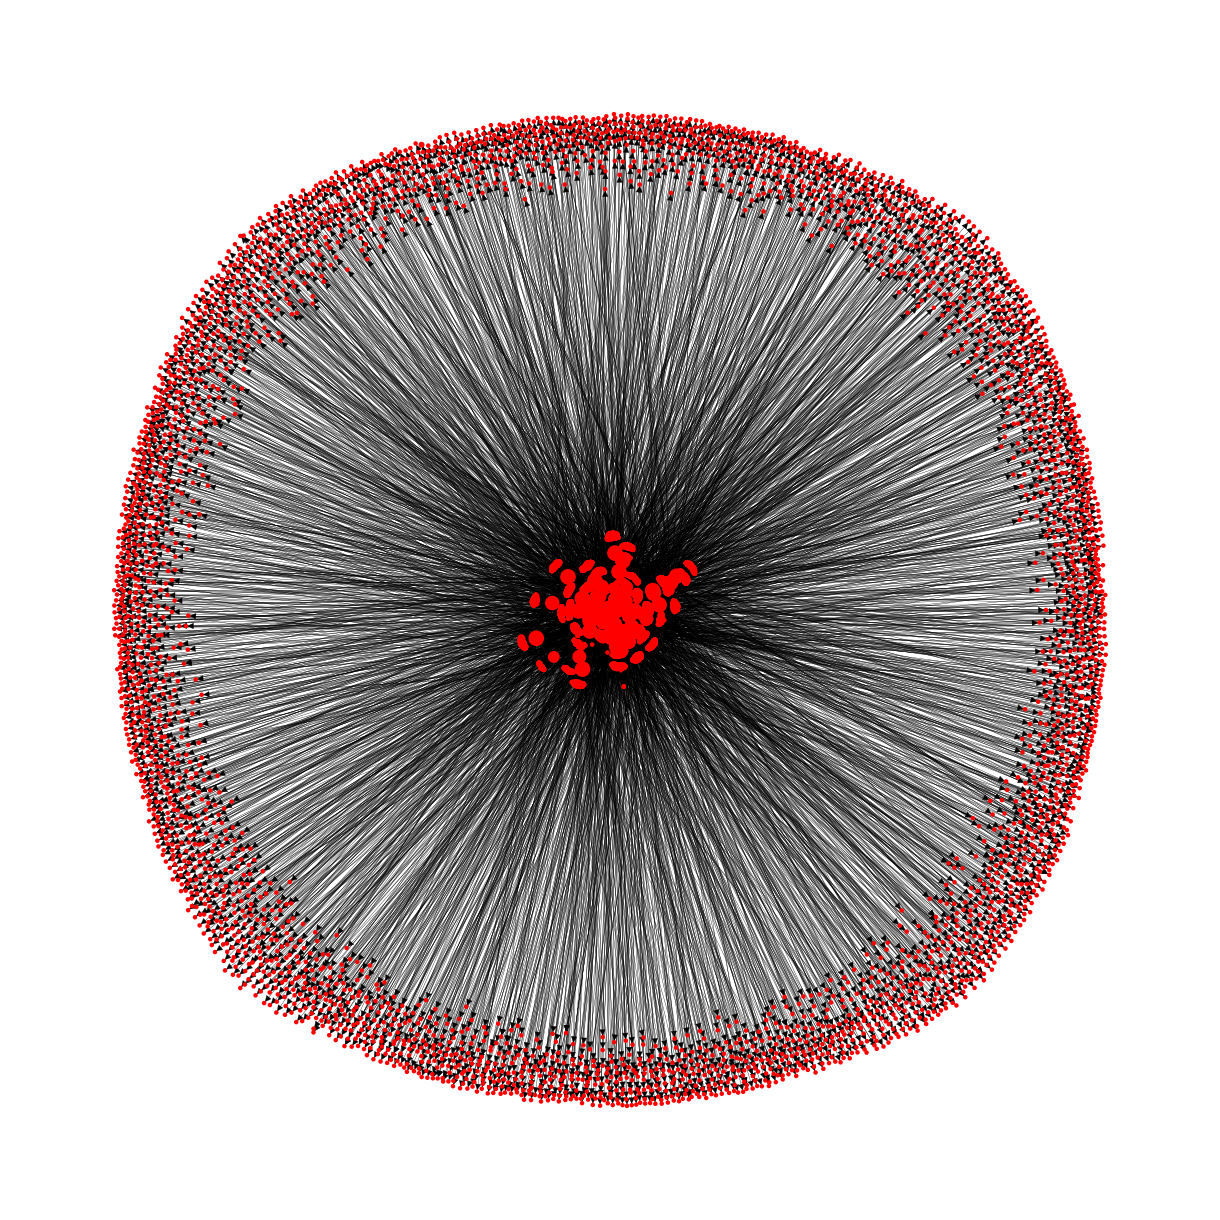

In [197]:
in_d = dict(G.in_degree())
# size is dependent on in degree. defaults to 10, so can see
plt.figure(1, figsize = (12, 12), dpi = 100)
nx.draw(G, node_size = [v + 5 if v > 5 else 5 for v in in_d.values()], node_color = 'red',
       width = [0.5 if v > 10 else 0.25 for v in in_d.values()], alpha = 1)
plt.savefig('graph.png', dpi = 100)

### Cleaning the graph

In [218]:
# to clean the graph, remove those that have a degree of 1, which takes up 7452 nodes
# maybe only high closeness

# remove nodes that have closeness < 0.05
low_cls = []
for k, v in cls.items():
    if v < 0.05:
        low_cls.append(k)

# remove nodes that have degree == 1
low_d = []
for k, v in d.items():
    if v < 2:
        low_d.append(k)

CleanGraph = nx.DiGraph()
CleanGraph.add_edges_from(EDGES)
CleanGraph.remove_nodes_from(low_cls)
CleanGraph.remove_nodes_from(low_d)

print('Total Nodes:', CleanGraph.number_of_nodes())

Total Nodes: 287


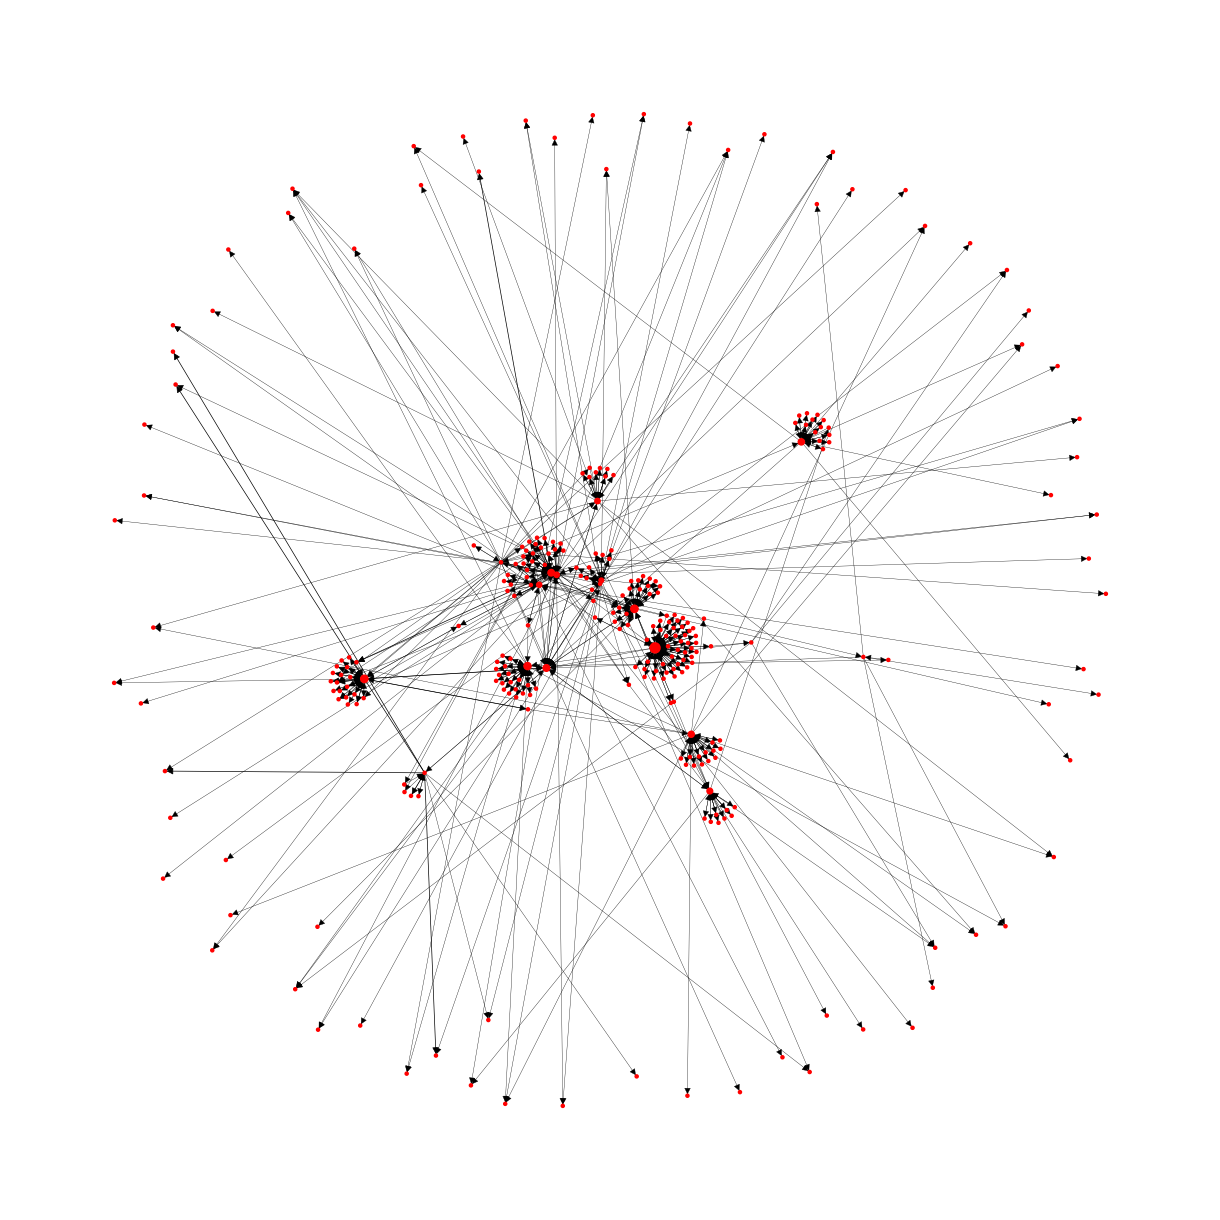

In [219]:
cl_in_d = dict(CleanGraph.in_degree())
plt.figure(1, figsize = (12, 12), dpi = 100)
nx.draw(CleanGraph, node_size = [v + 5 if v > 5 else 5 for v in cl_in_d.values()], node_color = 'red',
       width = [0.5 if v > 10 else 0.25 for v in cl_in_d.values()], alpha = 1)
plt.savefig('clean_graph1.png', dpi = 100)

In [220]:
in_d = dict(G.in_degree())
low_in_d = []
for k, v in in_d.items():
    if v == 1:
        low_in_d.append(k)

CleanGraph = nx.DiGraph()
CleanGraph.add_edges_from(EDGES)
CleanGraph.remove_nodes_from(low_in_d)

print('Total Nodes:', CleanGraph.number_of_nodes())

Total Nodes: 3942


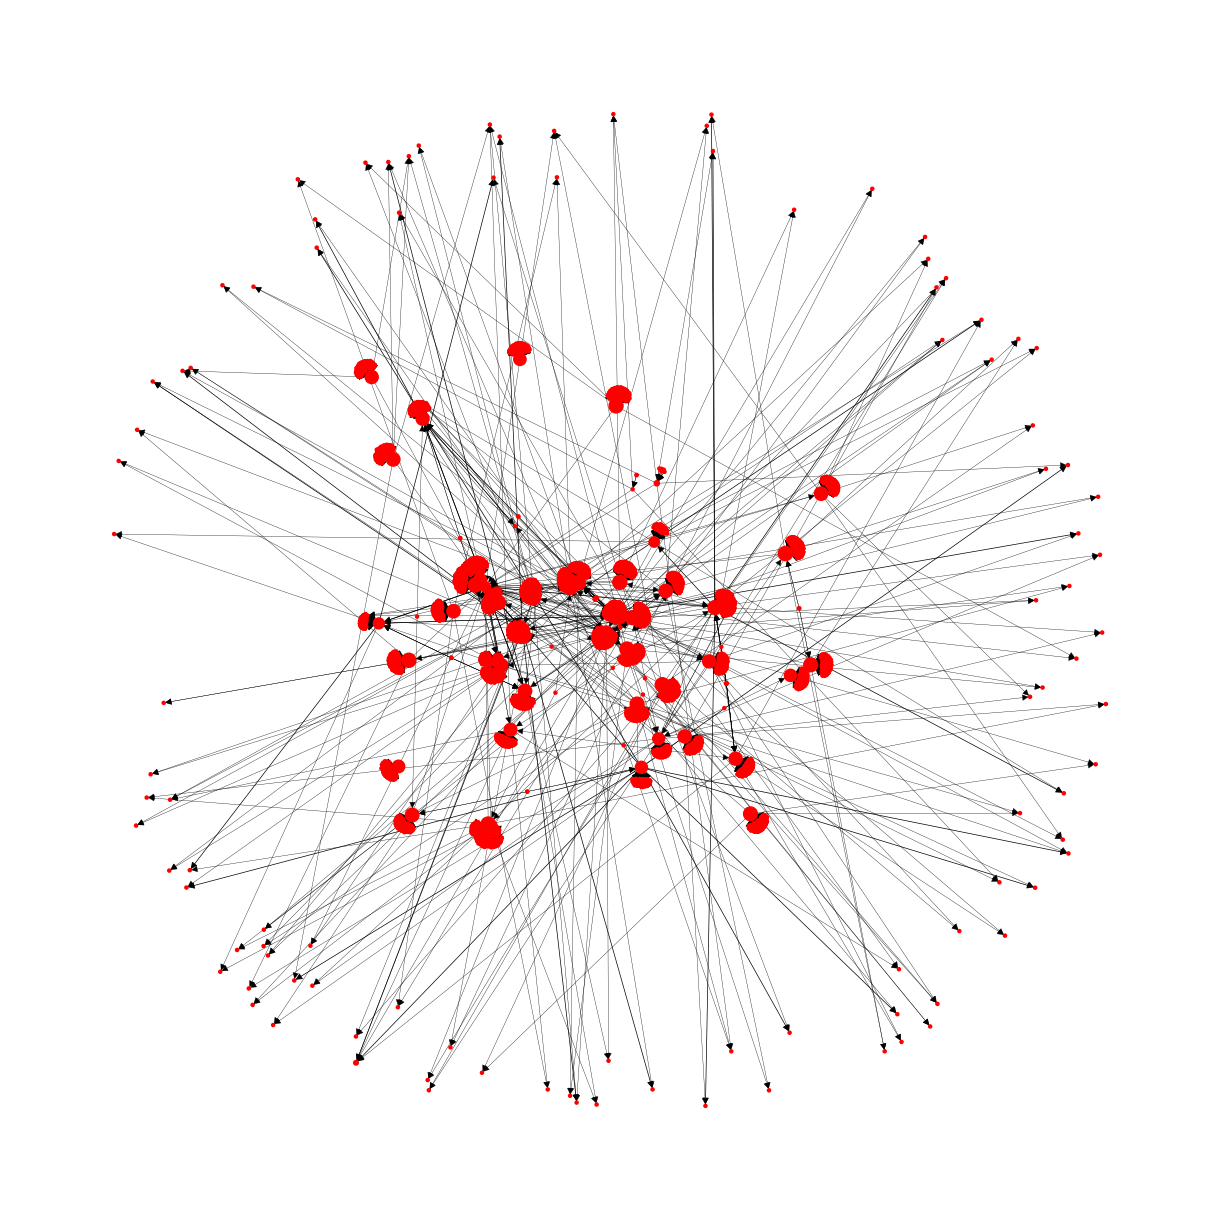

In [221]:
cl_in_d = dict(CleanGraph.in_degree())
plt.figure(1, figsize = (12, 12), dpi = 100)
nx.draw(CleanGraph, node_size = [v + 5 if v > 5 else 5 for v in cl_in_d.values()], node_color = 'red',
       width = [0.5 if v > 10 else 0.25 for v in cl_in_d.values()], alpha = 1)
plt.savefig('clean_graph2.png', dpi = 100)

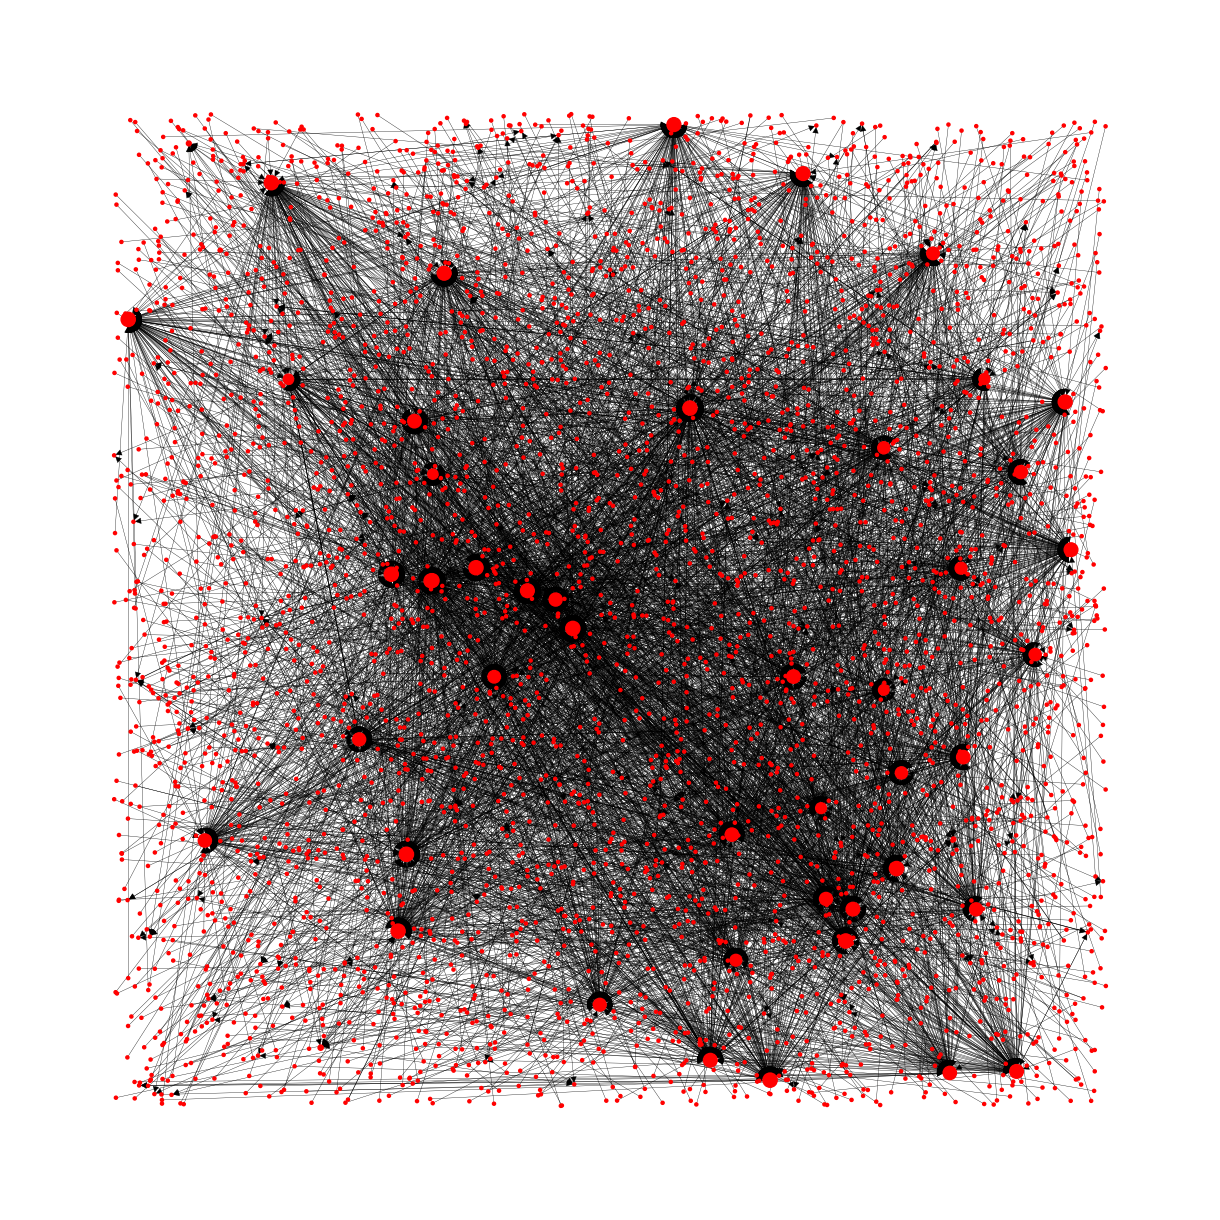

In [236]:
cl_in_d = dict(CleanGraph.in_degree())
plt.figure(1, figsize = (12, 12), dpi = 100)
pos = nx.random_layout(CleanGraph, seed = 422)
nx.draw(CleanGraph, node_size = [v + 5 if v > 5 else 5 for v in cl_in_d.values()], node_color = 'red',
       width = [0.5 if v > 10 else 0.25 for v in cl_in_d.values()], alpha = 1,
       pos = pos)
plt.savefig('clean_graph3.png', dpi = 100)

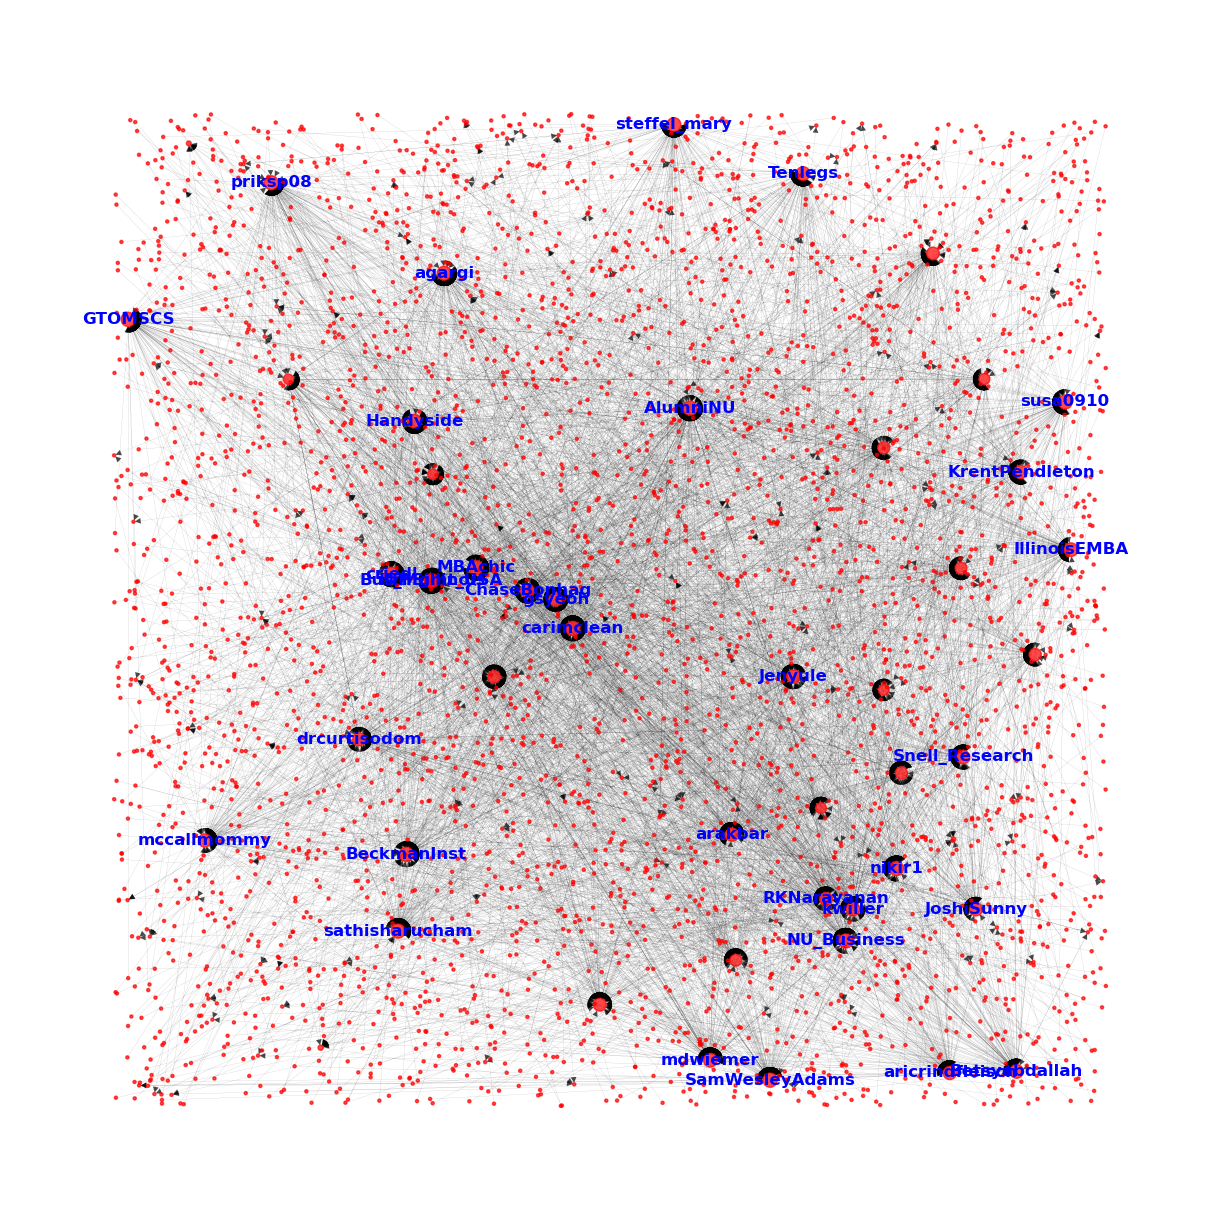

In [263]:
cl_in_d = dict(CleanGraph.in_degree())
plt.figure(1, figsize = (12, 12), dpi = 100)
pos = nx.random_layout(CleanGraph, seed = 422)
nx.draw(CleanGraph, node_size = [v + 5 if v > 5 else 5 for v in cl_in_d.values()], node_color = 'red',
       width = [0.125 if v > 10 else 0.06 for v in cl_in_d.values()], alpha = 0.7,
       pos = pos)
most_in_d_labels = {}
for n, v in cl_in_d.items():
    if v > 80:
        most_in_d_labels[n] = n
nx.draw_networkx_labels(CleanGraph, pos, most_in_d_labels, font_size = 12, font_weight = 'bold', font_color = 'b')
plt.savefig('clean_graph4labels.png', dpi = 100)